In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14

In [4]:
drink_cols = ['country', 'beer', 'spirit', 
              'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [5]:
drinks.describe()

beer      spirit        wine      liters
count  193.000000  193.000000  193.000000  193.000000
mean   106.160622   80.994819   49.450777    4.717098
std    101.143103   88.284312   79.697598    3.773298
min      0.000000    0.000000    0.000000    0.000000
25%     20.000000    4.000000    1.000000    1.300000
50%     76.000000   56.000000    8.000000    4.200000
75%    188.000000  128.000000   59.000000    7.200000
max    376.000000  438.000000  370.000000   14.400000

In [6]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country      193 non-null object
beer         193 non-null int64
spirit       193 non-null int64
wine         193 non-null int64
liters       193 non-null float64
continent    170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [8]:
drinks.head()

country  beer  spirit  wine  liters continent
0  Afghanistan     0       0     0     0.0        AS
1      Albania    89     132    54     4.9        EU
2      Algeria    25       0    14     0.7        AF
3      Andorra   245     138   312    12.4        EU
4       Angola   217      57    45     5.9        AF

In [9]:
drinks1 = drinks.copy()
drinks1.set_index(drinks['country'], inplace = True)
del drinks1['country']
del drinks1.index.name
drinks1.head()

beer  spirit  wine  liters continent
Afghanistan     0       0     0     0.0        AS
Albania        89     132    54     4.9        EU
Algeria        25       0    14     0.7        AF
Andorra       245     138   312    12.4        EU
Angola        217      57    45     5.9        AF

### 0.0.1 Line Plot

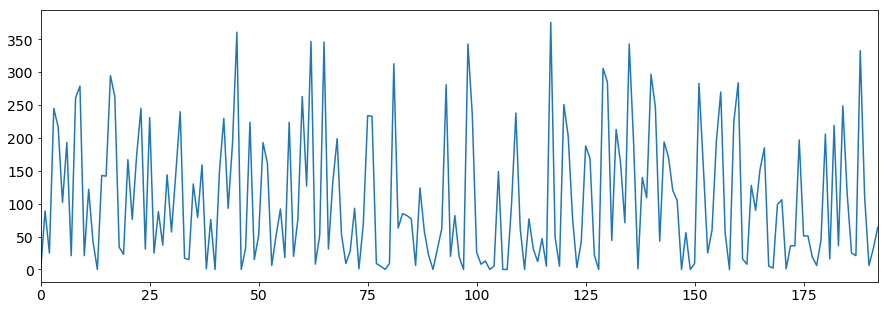

In [15]:
drinks['beer'].plot()

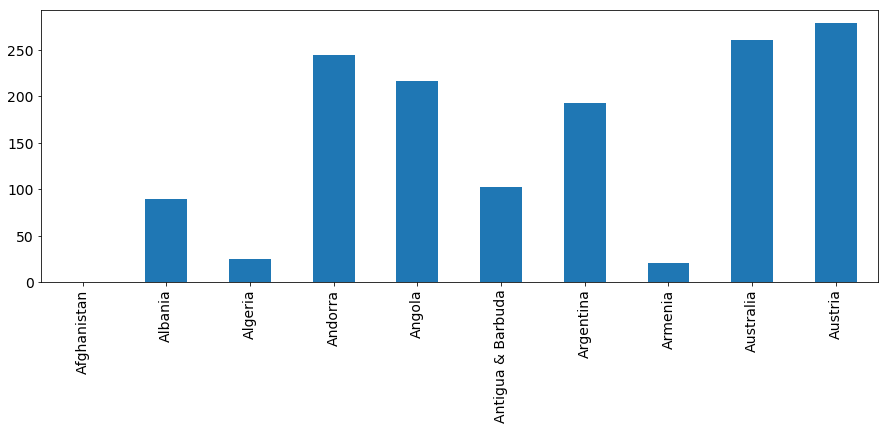

In [11]:
drinks1['beer'][:10].plot(kind = 'bar')
# 그리기는 다 plot으로 그린다
# kind 만 지정해주면 다양하게 선택 가능

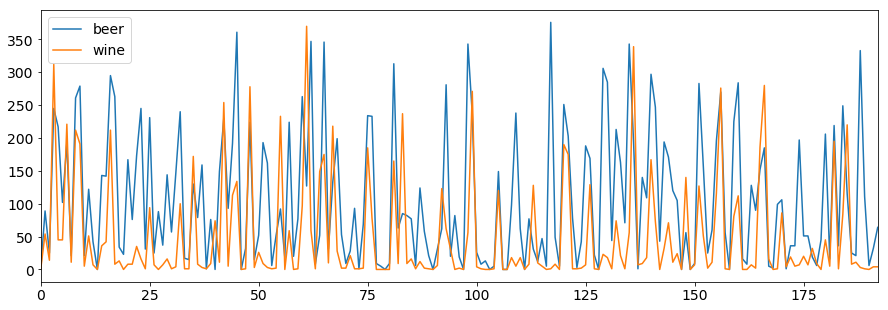

In [12]:
drinks[['beer', 'wine']].plot()

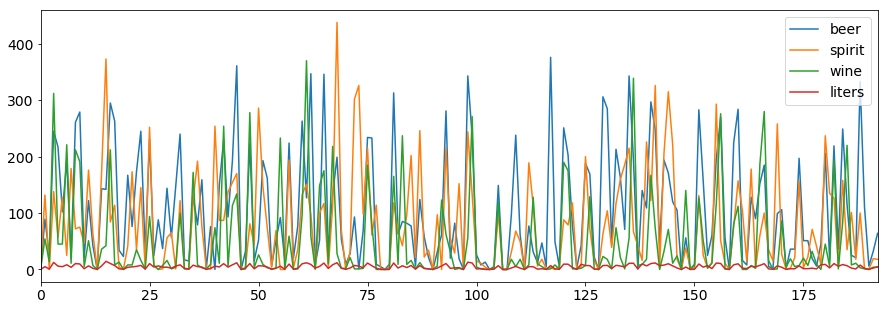

In [13]:
drinks.plot()

In [7]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
# ufo.Time 은 String => datatime type으로 바꿔준다
# 날짜를 가지고 연산을 할 수 있다.
ufo['Year'] = ufo.Time.dt.year

In [8]:
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933

In [9]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index(ascending=False).head()
# 연도를 기준으로 sorting

2014    5382
2013    7003
2012    7263
2011    5089
2010    4154
Name: Year, dtype: int64

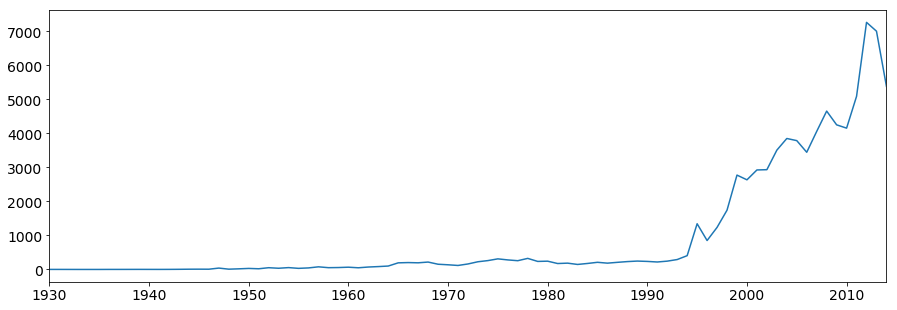

In [10]:
ufo.Year.value_counts().sort_index().plot()

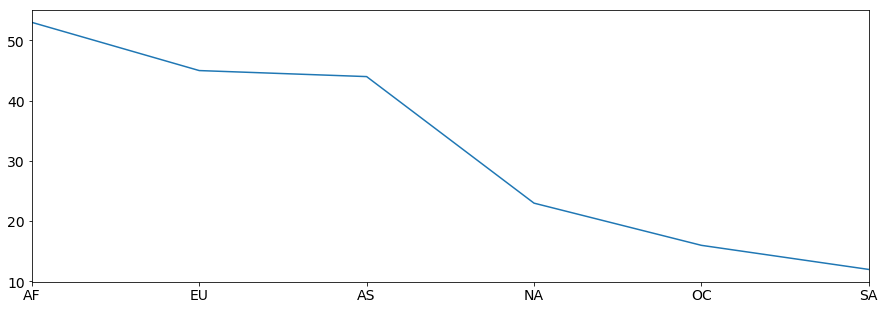

In [20]:
drinks.continent.value_counts().plot()

### 0.0.2 Histogram

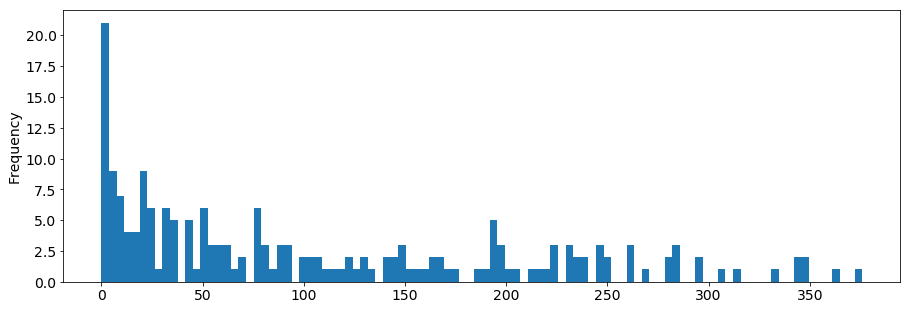

In [6]:
drinks.beer.plot(kind = 'hist', bins = 100)

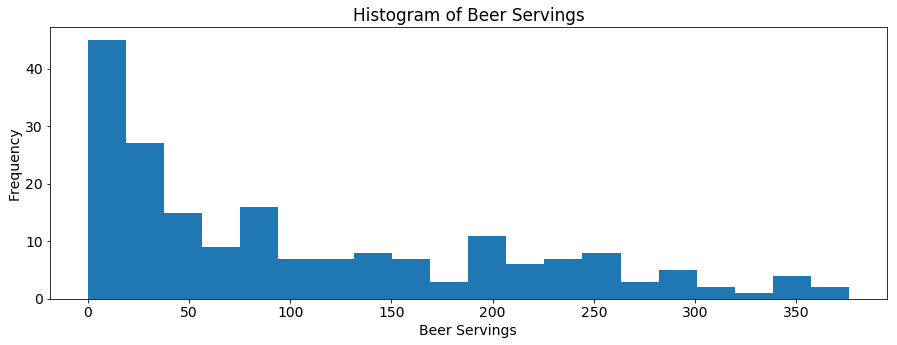

In [22]:
drinks.beer.plot(kind = 'hist', bins = 20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.title('Histogram of Beer Servings')
plt.savefig('histo.png')

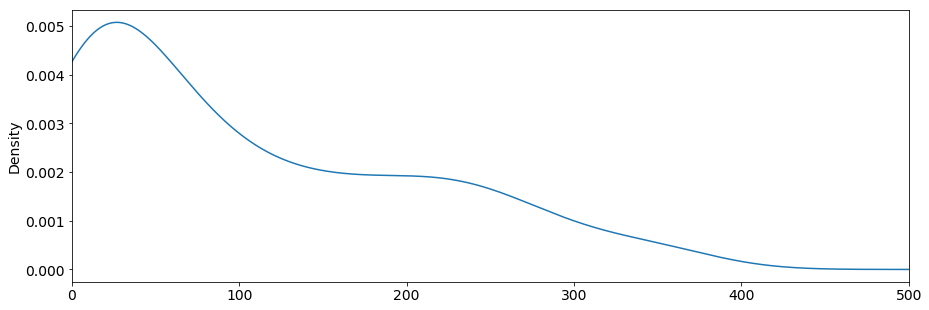

In [29]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind = 'density', xlim = (0, 500))

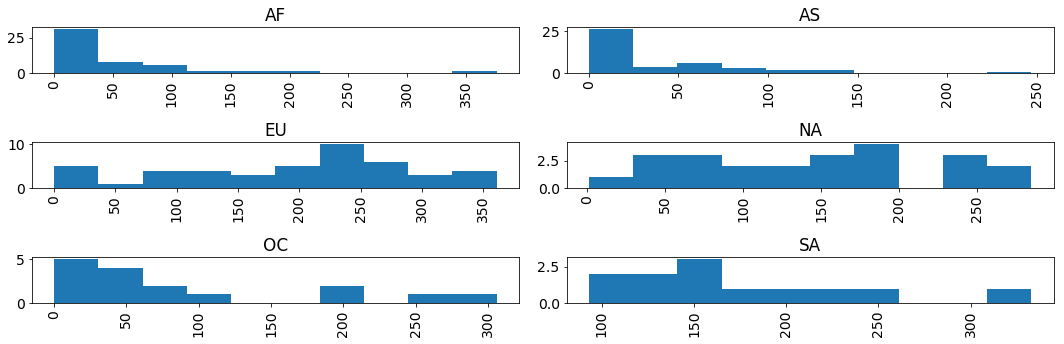

In [24]:
# histogram of beer servings grouped by continent
drinks.hist(column = 'beer', by = 'continent')
plt.tight_layout()

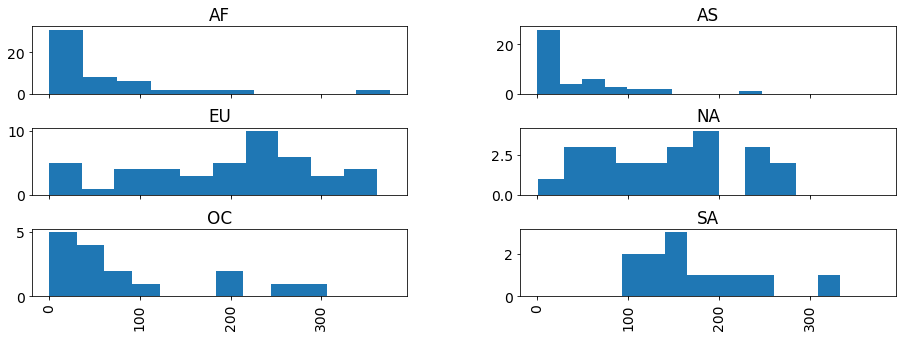

In [25]:
 # share the x axes
drinks.hist(column = 'beer', by = 'continent', sharex = True)
plt.show()

### 0.0.3 Scatter Plot

In [16]:
drinks[['beer', 'wine']].sort_values('beer').head()

beer  wine
0      0     0
40     0    74
79     0     0
90     0     0
97     0     0

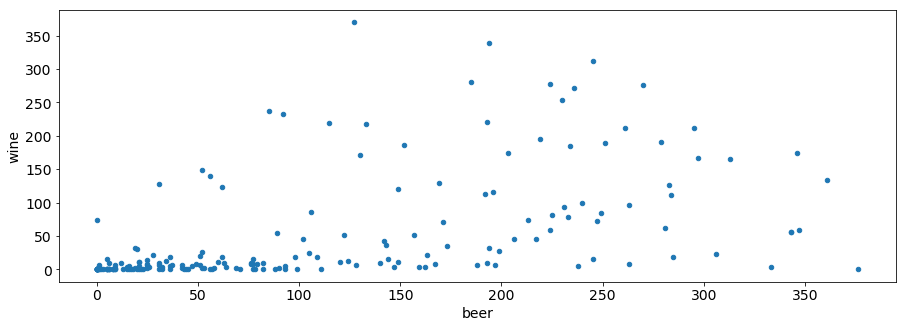

In [17]:
drinks.plot(kind = 'scatter', x = 'beer', y = 'wine')

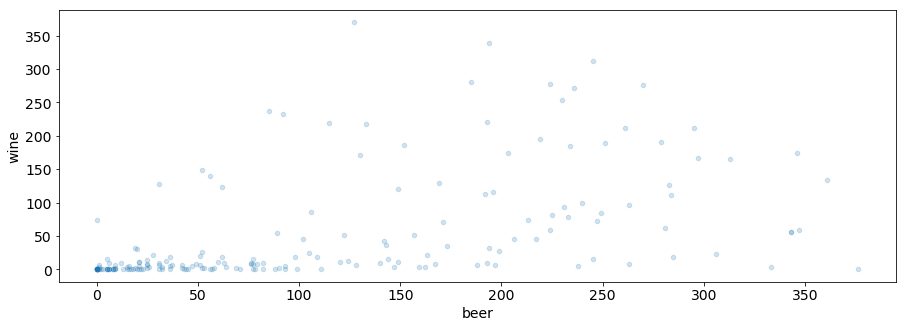

In [18]:
drinks.plot(kind = 'scatter', x = 'beer', y = 'wine', alpha = 0.2)

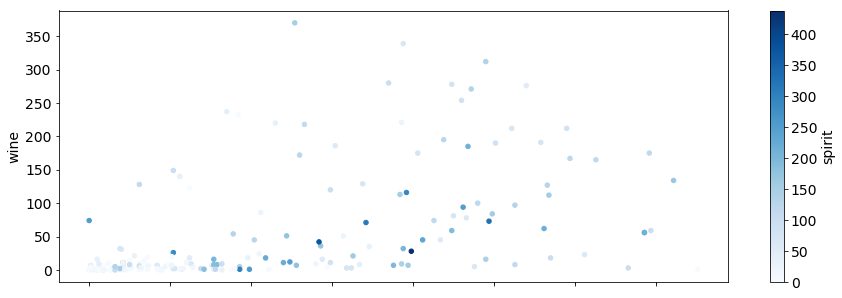

In [19]:
# vary point color by spirit servings
drinks.plot(kind = 'scatter', x = 'beer', y = 'wine', c = 'spirit', colormap = 'Blues')

### 0.0.4 Scatter-Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E03345BA8>,
      dtype=object)

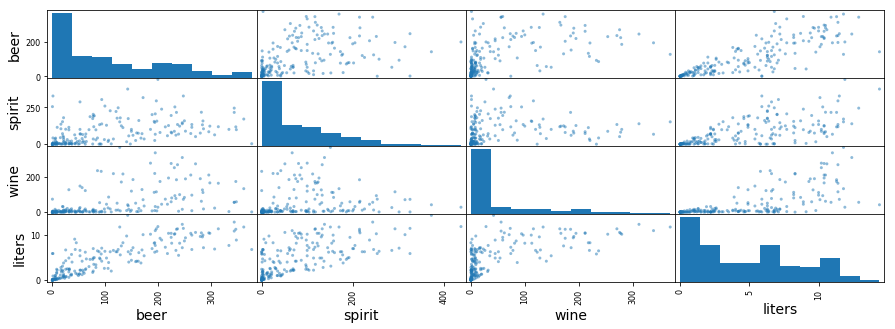

In [39]:
pd.plotting.scatter_matrix(drinks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192079E7208>,
      dtype=object)

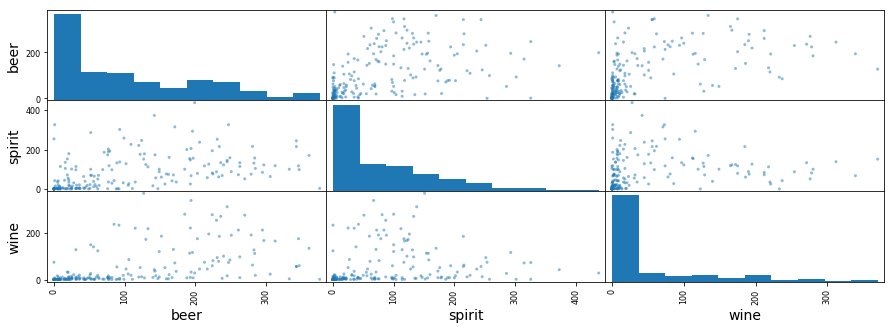

In [37]:
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019209138A90>,
      dtype=object)

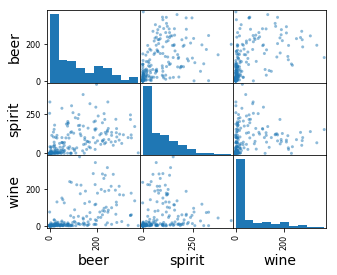

In [38]:
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize = (5, 4))

### 0.0.5 Bar Plot

In [39]:
drinks.head(3)

country  beer  spirit  wine  liters continent
0  Afghanistan     0       0     0     0.0        AS
1      Albania    89     132    54     4.9        EU
2      Algeria    25       0    14     0.7        AF

In [41]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

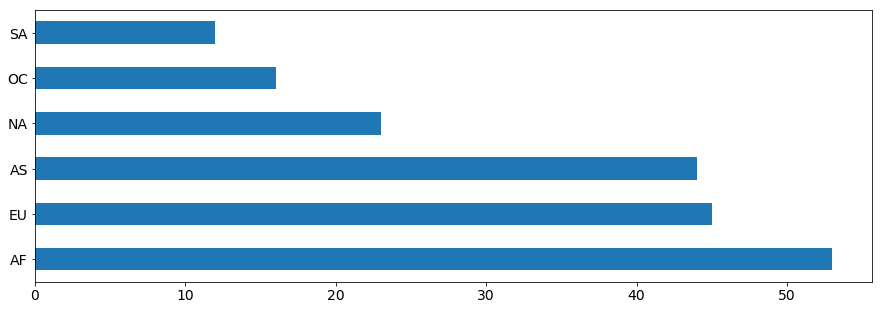

In [42]:
drinks.continent.value_counts().plot(kind = 'barh')

In [43]:
drinks.groupby('continent').mean()

beer      spirit        wine    liters
continent                                              
AF          61.471698   16.339623   16.264151  3.007547
AS          37.045455   60.840909    9.068182  2.170455
EU         193.777778  132.555556  142.222222  8.617778
NA         145.434783  165.739130   24.521739  5.995652
OC          89.687500   58.437500   35.625000  3.381250
SA         175.083333  114.750000   62.416667  6.308333

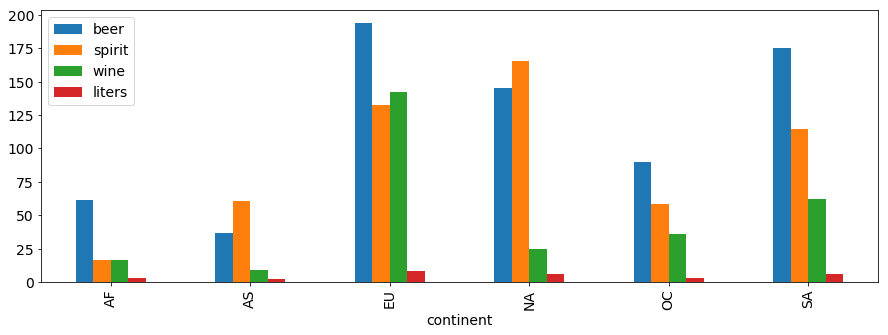

In [44]:
# side-by-side bar plots

drinks.groupby('continent').mean().plot(kind = 'bar')

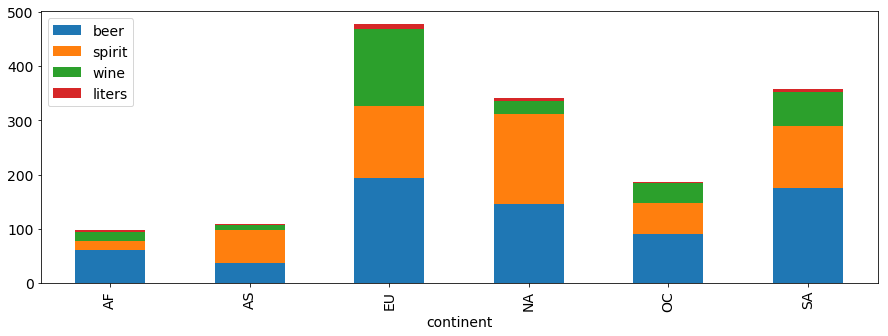

In [45]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind = 'bar', stacked = True)

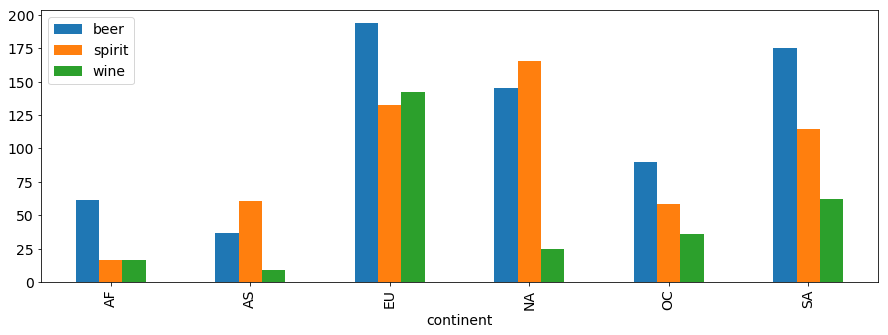

In [46]:
# drop the liters column

drinks.groupby('continent').mean().drop('liters', axis = 1).plot(kind = 'bar')

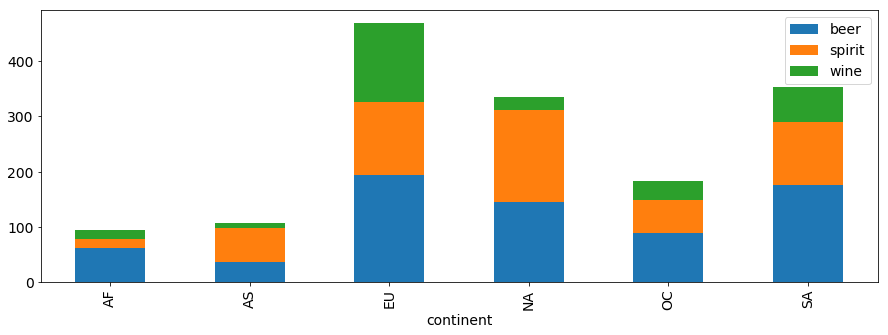

In [48]:
# drop the liters column

drinks.groupby('continent').mean().drop('liters', axis = 1)\
.plot(kind = 'bar', stacked = True)

In [49]:
drinks.spirit.sort_values().head()

0      0
27     0
128    0
118    0
111    0
Name: spirit, dtype: int64

In [50]:
drinks.head(3)

country  beer  spirit  wine  liters continent
0  Afghanistan     0       0     0     0.0        AS
1      Albania    89     132    54     4.9        EU
2      Algeria    25       0    14     0.7        AF

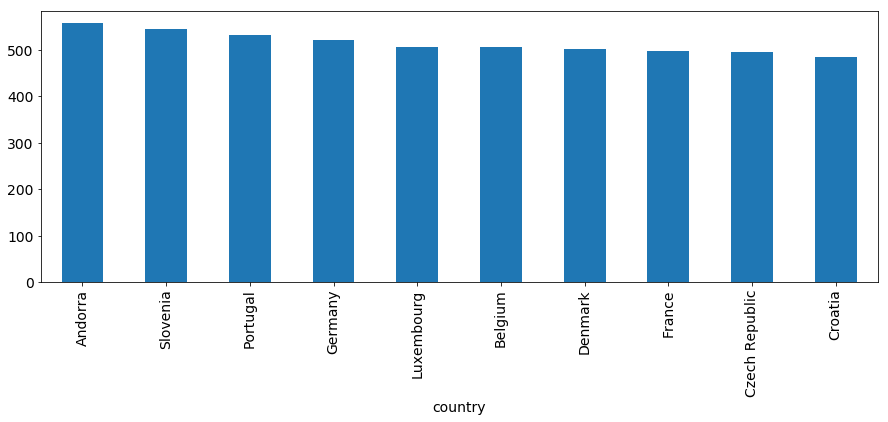

In [52]:
drink_country = drinks[['beer', 'wine']].sum(axis = 1)
drink_country.index = drinks.country
drink_country10 = drink_country.sort_values(ascending = False)[:10]
drink_country10.plot(kind = 'bar')

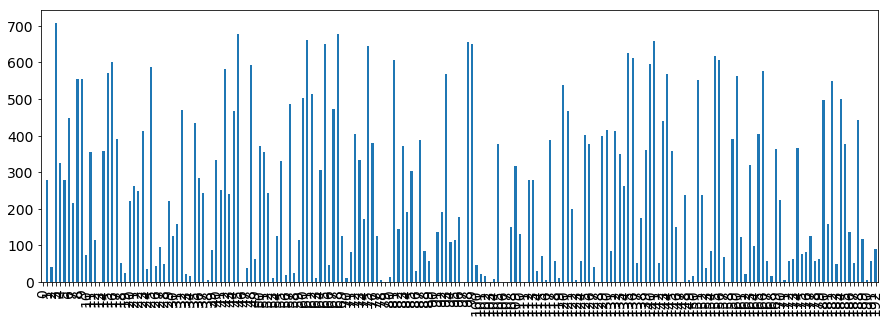

In [53]:
drinks.sum(axis = 1).plot(kind = 'bar')

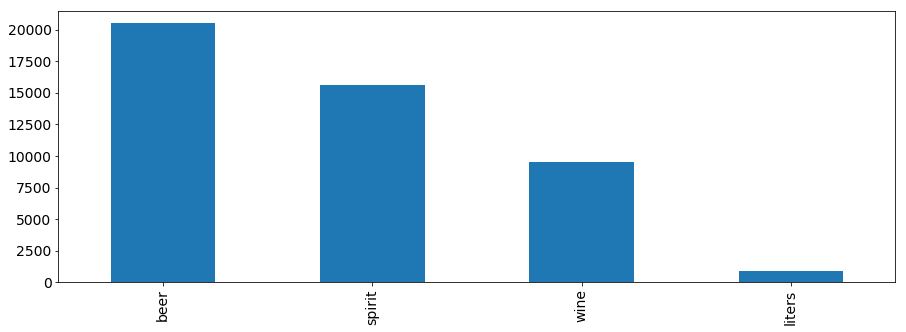

In [54]:
drinks[['beer', 'spirit', 'wine', 'liters']].sum(axis = 0).plot(kind= 'bar')

### 0.0.6 Box-Plot

In [55]:
drinks.head()

country  beer  spirit  wine  liters continent
0  Afghanistan     0       0     0     0.0        AS
1      Albania    89     132    54     4.9        EU
2      Algeria    25       0    14     0.7        AF
3      Andorra   245     138   312    12.4        EU
4       Angola   217      57    45     5.9        AF

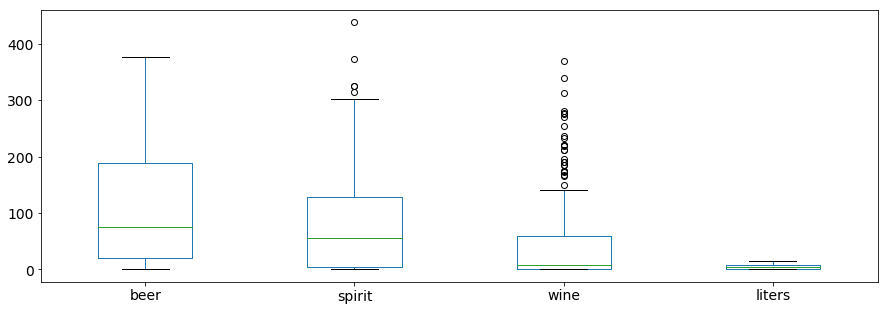

In [56]:
drinks.plot(kind = 'box')

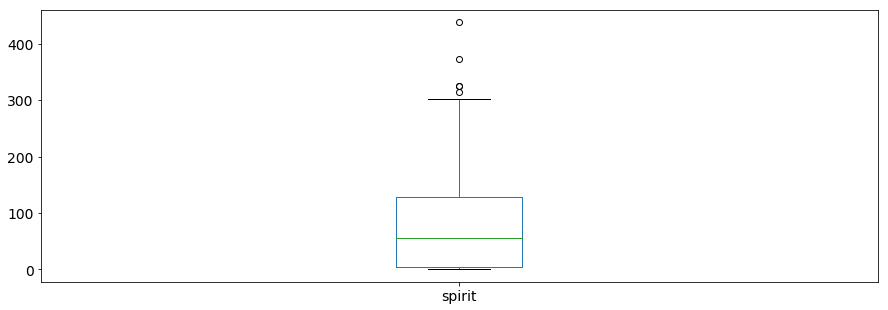

In [57]:
drinks.spirit.plot(kind = 'box')

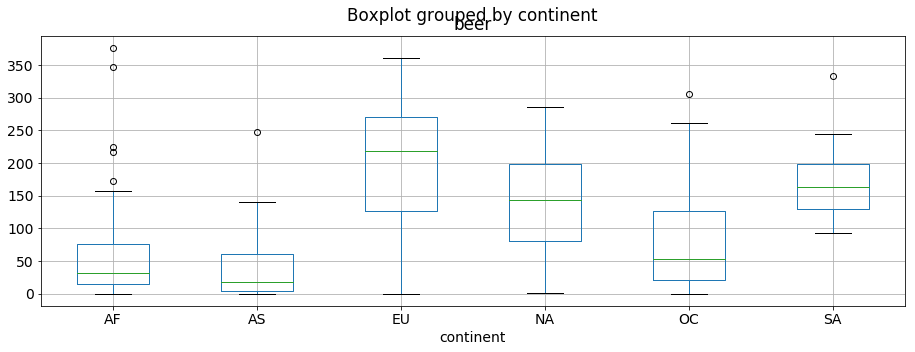

In [58]:
# box plot of beer servings grouped by continent

drinks.boxplot(column = 'beer', by = 'continent')

In [20]:
# box plot of beer servings grouped by continent

drinks.groupby('continent').mean().T

continent         AF         AS          EU          NA        OC          SA
beer       61.471698  37.045455  193.777778  145.434783  89.68750  175.083333
spirit     16.339623  60.840909  132.555556  165.739130  58.43750  114.750000
wine       16.264151   9.068182  142.222222   24.521739  35.62500   62.416667
liters      3.007547   2.170455    8.617778    5.995652   3.38125    6.308333

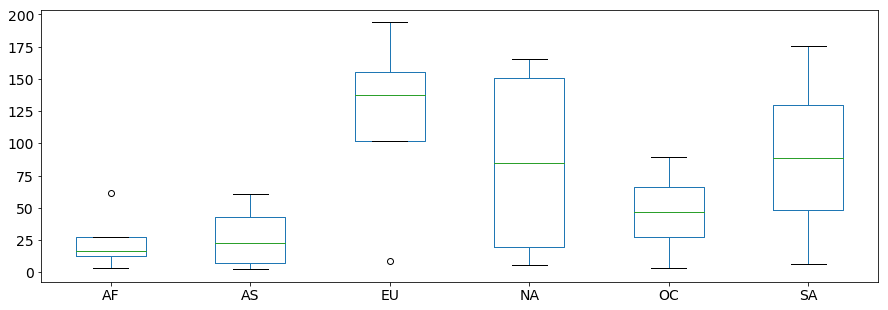

In [21]:
# box plot of beer servings grouped by continent

drinks.groupby('continent').mean().T.plot(kind = 'box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE81312E80>,
      dtype=object)

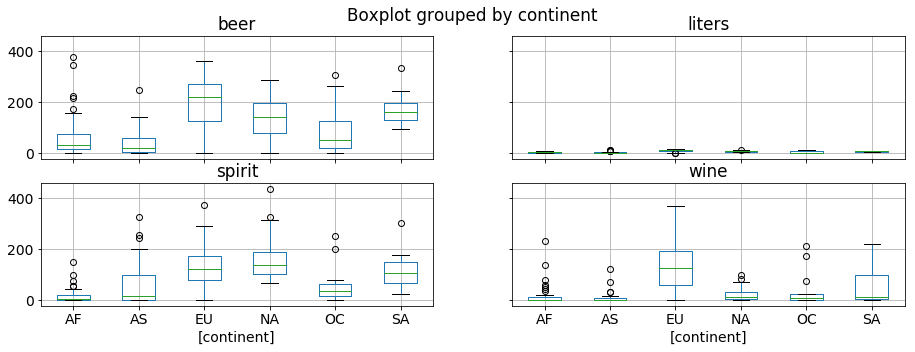

In [22]:
# box plot of all numeric columns grouped by continent

drinks.boxplot(by = 'continent')

### 0.0.7 Saving Plot

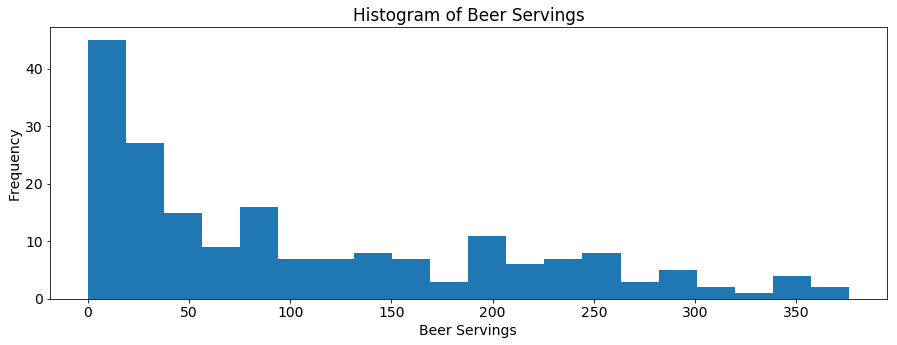

In [23]:
drinks.beer.plot(kind = 'hist',bins = 20, title = 'Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_original.png')